<a href="https://colab.research.google.com/github/VMBoehm/DeNoPa/blob/master/Cifar10ClassificationWithPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook does PCA on cifar 10**




In [72]:
from google.colab import drive

ROOT = "/content/gdrive"

drive.mount(ROOT, force_remount=True)

Mounted at /content/gdrive


In [73]:
%pylab inline
import pickle
import numpy as np
import tensorflow

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cov', 'svd', 'axes', 'sign', 'eig', 'mean', 'indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
import tensorflow as tf


In [0]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.cifar10.load_data()

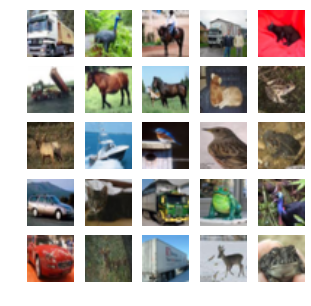

In [76]:

fig, axes = plt.subplots(5,5,figsize=(5,5))
k =0
for j in range(5):
  for i in range(5):
    k+=1
    axes[i][j].imshow(x_train[k], interpolation='bilinear')
    axes[i][j].axis('off')

In [77]:
DATA_SHAPE = 32*32*3
X_TRAIN    = x_train.reshape(-1,DATA_SHAPE)
X_TEST     = x_test.reshape(-1,DATA_SHAPE)
print(X_TEST.shape)

(10000, 3072)


In [0]:
pca_path = './gdrive/My Drive/PCA/cifar10/'

In [0]:
from sklearn.decomposition import PCA


# for ii in range(10):
#   indices = np.where(y_train==ii)[0]
#   print(ii)
#   x_train_class = X_TRAIN[indices]


#   mean      = np.mean(x_train_class, axis=0)

  
#   mean_image = mean.reshape((32,32,3))
  
  
  
#   plt.figure()
#   plt.imshow((mean_image-min(mean))/(max(mean)-min(mean)),interpolation='nearest')
#   plt.show()
  
#   num       = x_train_class.shape[1]
#   pca = PCA(svd_solver='full',n_components=num)
#   pca.fit(x_train_class)  

#   pickle.dump([pca,mean], open(pca_path+'pca_on_%d_num_comp_full.pkl'%ii,'wb'))



In [21]:
32*32

1024

In [0]:
import numpy.linalg as lg
def get_probability_of_data(logdet,Cinv,data, mean):
  d    = len(data)
  data = data-mean
  Cinv_d = np.einsum('jk,...k->...j',Cinv,data, optimize=True)
  
  logprob = -0.5*logdet-0.5*d*np.log((2*np.pi))-0.5*np.einsum('ij,ij->i',data, Cinv_d, optimize=True)
  return logprob

In [100]:
# do classification
import time
nums = [3*1024]#[128,3*128,256,3*256,512,3*512,1024,3*1024]
acc = np.zeros((len(nums),10))


for ll in range(len(nums)):
  num = nums[ll] 
  logprob=np.zeros((10,10,1000))
  print(ll)
  for jj in range(10):
    print(jj)
    pca, mean = pickle.load(open(pca_path+'pca_on_%d_num_comp_full.pkl'%(jj),'rb')) 
      
    sing     = pca.explained_variance_[0:num]
    R        = pca.components_[0:num]

    if num<3*1024:
      sigma2 = np.mean(pca.explained_variance_[num::])
    else:
      sigma2 = 0.
    
      
    C_       = np.dot(R.T,np.dot(np.diag(sing), R))+np.eye(DATA_SHAPE)*sigma2
    Cinv     = lg.inv(C_)
    sign ,logdetC = lg.slogdet(C_)
    
    print(max(abs(np.mean(data,axis=0)/mean)-1))
    for ii in range(10):
      print(ii)
      indices       = np.where(y_test==ii)[0]
      data          = X_TEST[indices]
      logprob_      = get_probability_of_data(logdetC,Cinv,data,np.mean(data,axis=0))
      logprob[jj,ii]= logprob_
      

  for ii in range(10):
    correct = len(np.where(np.argsort(logprob[:,ii,:], axis=0)[-1]==ii)[0])
    print(correct)
    acc_    = np.float(correct)/1000.
    print('acc:', acc_)
    acc[ll,ii]=acc_
    
#pickle.dump(acc, open(pca_path+'accuracies_testset.pkl','wb'))

0
0
0.0638626053365372
1
0.05544111175596478
2
0.04587395785246695
3
0.05249770615047655
4
0.026033968239844052
5
0.061196517109193715
6
0.045953336156225655
7
0.06961527519788491
8
0.04764882389602243
9
0.08312183304196563


In [0]:
acctest = pickle.load(open(pca_path+'accuracies_testset.pkl','rb'))


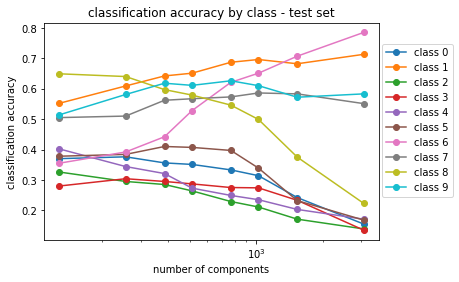

In [89]:
jj = np.argsort(nums)
nums = np.asarray(nums)
plt.title('classification accuracy by class - test set')
for ii in range(10):
  plt.semilogx(nums[jj], acctest[jj,ii], marker='o',label='class %d'%ii)
  plt.xlabel('number of components')
  plt.ylabel('classification accuracy')
  plt.legend(loc=(1.01,0.2))

In [90]:
# do classification
import time
nums =  [128,3*128,256,3*256,512,3*512,1024,3*1024]
acc = np.zeros((len(nums),10))


for ll in range(len(nums)):
  num = nums[ll] 
  logprob=np.zeros((10,10,5000))
  print(ll)
  for jj in range(10):
    print(jj)
    pca, mean = pickle.load(open(pca_path+'pca_on_%d_num_comp_full.pkl'%(jj),'rb')) 
      
    sing     = pca.explained_variance_[0:num]
    R        = pca.components_[0:num]

    sigma2   = np.mean(pca.explained_variance_[num::])
      
    C_       = np.dot(R.T,np.dot(np.diag(sing), R))+np.eye(DATA_SHAPE)*sigma2
    Cinv     = lg.inv(C_)
    sign ,logdetC = lg.slogdet(C_)
    
   
    for ii in range(10):
      print(ii)
      indices       = np.where(y_train==ii)[0]
      data          = X_TRAIN[indices]
      logprob_      = get_probability_of_data(logdetC,Cinv,data,mean)
      logprob[jj,ii]= logprob_
      

  for ii in range(10):
    correct = len(np.where(np.argsort(logprob[:,ii,:], axis=0)[-1]==ii)[0])
    print(correct)
    acc_    = np.float(correct)/5000.
    print('acc:', acc_)
    acc[ll,ii]=acc_
    
pickle.dump(acc, open(pca_path+'accuracies_trainset.pkl','wb'))

0
0
0
1
2
3
4
5
6
7
8
9
1
0
1
2
3
4
5
6
7
8
9
2
0
1
2
3
4
5
6
7
8
9
3
0
1
2
3
4
5
6
7
8
9
4
0
1
2
3
4
5
6
7
8
9
5
0
1
2
3
4
5
6
7
8
9
6
0
1
2
3
4
5
6
7
8
9
7
0
1
2
3
4
5
6
7
8
9
8
0
1
2
3
4
5
6
7
8
9
9
0
1
2
3
4
5
6
7
8
9
2809
acc: 0.5618
3874
acc: 0.7748
2899
acc: 0.5798
2958
acc: 0.5916
3402
acc: 0.6804
3210
acc: 0.642
3125
acc: 0.625
3466
acc: 0.6932
3918
acc: 0.7836
3649
acc: 0.7298
1
0
0
1
2
3
4
5
6
7
8
9
1
0
1
2
3
4
5
6
7
8
9
2
0
1
2
3
4
5
6
7
8
9
3
0
1
2
3
4
5
6
7
8
9
4
0
1
2
3
4
5
6
7
8
9
5
0
1
2
3
4
5
6
7
8
9
6
0
1
2
3
4
5
6
7
8
9
7
0
1
2
3
4
5
6
7
8
9
8
0
1
2
3
4
5
6
7
8
9
9
0
1
2
3
4
5
6
7
8
9
4049
acc: 0.8098
4451
acc: 0.8902
4365
acc: 0.873
4393
acc: 0.8786
4538
acc: 0.9076
4610
acc: 0.922
4021
acc: 0.8042
4418
acc: 0.8836
4769
acc: 0.9538
4341
acc: 0.8682
2
0
0
1
2
3
4
5
6
7
8
9
1
0
1
2
3
4
5
6
7
8
9
2
0
1
2
3
4
5
6
7
8
9
3
0
1
2
3
4
5
6
7
8
9
4
0
1
2
3
4
5
6
7
8
9
5
0
1
2
3
4
5
6
7
8
9
6
0
1
2
3
4
5
6
7
8
9
7
0
1
2
3
4
5
6
7
8
9
8
0
1
2
3
4
5
6
7
8
9
9
0
1
2
3
4
5
6
7
8


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:2034: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)


0
1
2
3
4
5
6
7
8
9
1
0
1
2
3
4
5
6
7
8
9
2
0
1
2
3
4
5
6
7
8
9
3
0
1
2
3
4
5
6
7
8
9
4
0
1
2
3
4
5
6
7
8
9
5
0
1
2
3
4
5
6
7
8
9
6
0
1
2
3
4
5
6
7
8
9
7
0
1
2
3
4
5
6
7
8
9
8
0
1
2
3
4
5
6
7
8
9
9
0
1
2
3
4
5
6
7
8
9
0
acc: 0.0
0
acc: 0.0
0
acc: 0.0
0
acc: 0.0
0
acc: 0.0
0
acc: 0.0
0
acc: 0.0
0
acc: 0.0
0
acc: 0.0
5000
acc: 1.0


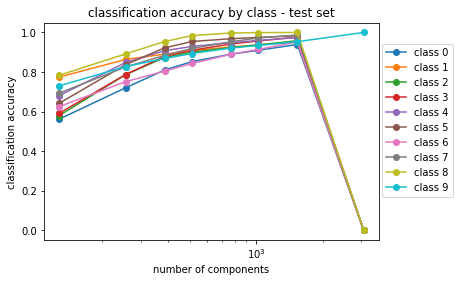

In [95]:
nums =  [128,3*128,256,3*256,512,3*512,1024,3*1024]
jj = np.argsort(nums)
nums = np.asarray(nums)
acctrain = pickle.load(open(pca_path+'accuracies_trainset.pkl','rb'))
plt.title('classification accuracy by class - test set')
for ii in range(10):
  plt.semilogx(nums[jj], acctrain[jj,ii], marker='o',label='class %d'%ii)
  plt.xlabel('number of components')
  plt.ylabel('classification accuracy')
  plt.legend(loc=(1.01,0.2))

In [0]:
from sklearn.covariance import LedoitWolf, EmpiricalCovariance

# for ii in range(10):
#   indices = np.where(y_train==ii)[0]
#   print(ii)
#   x_train_class = X_TRAIN[indices]
#   cov = LedoitWolf().fit(x_train_class).covariance_
#   cov2= EmpiricalCovariance().fit(x_train_class).covariance_
#   print(cov)
#   print(cov2)
#   svd = np.linalg.svd(cov)
# #   num       = x_train_class.shape[1]
# #   pca = PCA(svd_solver='full',n_components=num)
# #   pca.fit(x_train_class)  
#   pickle.dump(svd, open(pca_path+'LedoitWolf_SVD_on_%d_num_comp_full.pkl'%ii,'wb'))

In [20]:
for ii in range(1):
  indices = np.where(y_train==ii)[0]
  x_train_class = X_TRAIN[indices]
  svd = pickle.load(open(pca_path+'LedoitWolf_SVD_on_%d_num_comp_full.pkl'%ii,'rb'))
  
  eig = np.linalg.eigvals(cov)
  svd = np.linalg.svd(cov)
  mean = np.mean(x_train_class, axis=0)
  cov  = EmpiricalCovariance(assume_centered=False).fit(x_train_class).covariance_
  svd1 = np.linalg.svd((x_train_class-mean).T)
  svd2 = np.linalg.svd((x_train_class-mean))
  pca = PCA(svd_solver='full',n_components=1024*3)
  pca_= pca.fit(x_train_class)
  print(eig)
  print(svd[1])
  print(pca.singular_values_)
  print(pca.explained_variance_)
  print(svd1[1])
  print(svd2[1])


0
[4.23599991e+06 1.51816957e+06 7.36732741e+05 ... 6.59083888e-02
 6.56086921e-02 6.55158801e-02]
[4.23599991e+06 1.51816957e+06 7.36732741e+05 ... 1.69601282e-02
 1.64317936e-02 1.63043485e-02]
[1.45533500e+05 8.71254717e+04 6.06931932e+04 ... 9.20872635e+00
 9.06415843e+00 9.02893916e+00]
[4.23684728e+06 1.51847326e+06 7.36880117e+05 ... 1.69635209e-02
 1.64350806e-02 1.63076100e-02]
[1.45533500e+05 8.71254717e+04 6.06931932e+04 ... 9.20872635e+00
 9.06415843e+00 9.02893916e+00]
[1.45533500e+05 8.71254717e+04 6.06931932e+04 ... 9.20872635e+00
 9.06415843e+00 9.02893916e+00]


In [71]:

X = np.random.randn(1000*8)
X = X.reshape((1000,8))
mean = np.mean(X,axis=0)
cov_esti = np.dot(X.T,X)#/1000.
eig_esti = np.linalg.eigvals(cov_esti)
cov  = EmpiricalCovariance(assume_centered=False).fit(X).covariance_
pca  = PCA(svd_solver='full',n_components=8)
pca_ = pca.fit(X-mean)
eig  = np.linalg.eigvals(cov)
svd  = np.linalg.svd(cov)
svd_ = np.linalg.svd(X.T)
R    = pca.components_
print(np.sort(eig)[::-1])
print(np.sqrt(np.sort(eig_esti)[::-1]))
print(pca_.explained_variance_)
print(svd[1])
print(np.sqrt(svd_[1]))
print(pca_.singular_values_)
cov_     = np.dot(R.T,np.dot(np.diag(pca.explained_variance_), R))
print(max(abs((cov-cov_)/cov).flatten()))

[1.07438662 1.06258854 1.05087041 0.99726382 0.9642972  0.92445381
 0.88026481 0.85747622]
[32.7893909  32.5985359  32.41714967 31.59843122 31.05705705 30.41259358
 29.68521207 29.32766163]
[1.07546208 1.06365219 1.05192234 0.99826208 0.96526246 0.92537919
 0.88114595 0.85833455]
[1.07438662 1.06258854 1.05087041 0.99726382 0.9642972  0.92445381
 0.88026481 0.85747622]
[5.72620214 5.70951276 5.69360603 5.62124819 5.57288588 5.51476143
 5.44841372 5.41550197]
[32.77783732 32.59737013 32.41713147 31.57948421 31.05313508 30.40483197
 29.66925694 29.28269484]
0.0010010010019762092


In [68]:
n = 9
m = 4
X = np.random.uniform(size=n*m).reshape(n, m)
sing = np.sort(np.linalg.svd(X)[1]), 
eig = np.sort(np.linalg.eigvals(np.dot(X.T, X.T)))
sing/eig**0.5

array([[1., 1., 1., 1.]])

In [24]:
R        = pca.components_
cov_     = np.dot(R.T,np.dot(np.diag(pca.explained_variance_), R))
print((cov-cov_)/cov)

[1.45533500e+05 8.71254717e+04 6.06931932e+04 ... 9.20872635e+00
 9.06415843e+00 9.02893916e+00]
